# Day 11 Pre-Class Assignment: Fourier Transform
### <p style="text-align: right;"> &#9989; Cesarine Graham</p>


## Goals of this assignment

The goals of this assignment are:

* Learn about the purpose of Fourier transformation
* Study two algorithms for numerically computing Fourier transforms

## Assignment instructions

Upload the assignment to Gradescope before 5PM the day of the next class.

---
## Part 0: Why Fourier transformation?
The Fourier transform is one of the most useful, and most widely used, tools in theoretical physics.
It's also very useful in computational physics.
It allows us to break down signals into component parts that are the eigenfunctions of the differential operator.
In this Fourier space, we can analyze, smooth, or filter the signal.
It gives us a way to rapidly perform certain kinds of calculations and solve differential equations, such as the diffusion equation or Schrödinger equation.
We will look at how Fourier transforms are used in computational physics and at the computational methods for calculating them.

## Part 1: Fourier Transformation (FT)

### 1.1 Learn about the Fourier transform
Let's learn about the Fourier transform by watching the video below:

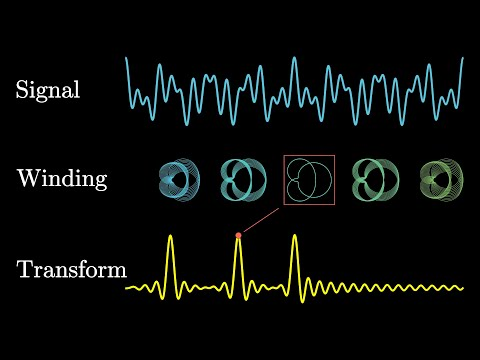

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("spUNpyF58BY",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=spUNpyF58BY

### 1.2 Relation to Fourier series
One motivation for the Fourier transform comes from the study of Fourier series.
In Fourier series, complicated but periodic functions are written as the sum of simple sine and cosine waves.
The Fourier transform is an extension of the Fourier series idea where we allow the period of the function to approach infinity, meaning we can also use it on nonperiodic functions.

In the Fourier transform, it is desirable to use Euler's formula, $e^{i 2\pi \theta} = \cos(2\pi \theta) + i \sin(2\pi \theta)$, to write the series using a single kind of wave $e^{2\pi i\theta}$.
Rewriting sines and cosines as complex exponentials makes it necessary for the Fourier coefficients to be complex-valued.
The usual interpretation of this complex number is that it gives both the amplitude of the wave and its phase.

There is a close connection between the definition of a Fourier series and the Fourier transform for functions $f$ that are zero outside an interval.
For such a function, we can calculate its Fourier series on any interval that includes the points where $f$ is not zero.
Suppose we select a $T$ large enough that the interval $[-\frac{T}{2},\frac{T}{2}]$ contains the interval where $f$ is nonzero.
Then, the $n$th Fourier-series coefficient $c_n$ is

$$ c_n = \frac{1}{T} \int_{-{\frac {T}{2}}}^{\frac{T}{2}} dx\, f(x)e^{-2\pi i\frac{n}{T}x} $$

Under appropriate conditions, the Fourier series of $f$ will equal the function $f$:

$$ f(x) = \sum_{n=-\infty}^{\infty}c_{n}\,e^{2\pi i \frac{n}{T} x} $$

Then, we can make the definitions

$$\xi_n = \frac{n}{T} \quad\text{and}\quad \Delta \xi = \frac{n + 1}{T}-\frac{n}{T} = \frac{1}{T}.$$

$$ \begin{align}
f(x) &= \sum _{n=-\infty }^{\infty }c_{n}\,e^{2\pi i\left({\frac {n}{T}}\right)x} \\
     &\rightarrow \sum_{n=-\infty}^{\infty} \Delta\xi\,\hat{f}(\xi_n)\,e^{2\pi i\xi_n x}  \\
     &\rightarrow \int_{-\infty}^{\infty} d\xi\,\hat{f}(\xi)\,e^{2\pi i\xi x}
\end{align}$$

As we increase the length of the interval in which we calculate the Fourier series, the Fourier series coefficients begin to resemble the Fourier transform and the sum of the Fourier series of $f$ begins to resemble the inverse Fourier transform.
By letting $T \rightarrow \infty$, this will converge to the integral for the inverse Fourier transform.
Thus, the Fourier coefficients are equal to the values of the Fourier transform sampled on a grid of width $\frac{1}{T}$ , multiplied by the grid width $\frac{1}{T}$.

In the study of Fourier series the numbers $c_n$ could be thought of as the "amount" of the wave present in the Fourier series of $f$.
Similarly, the Fourier transform can be thought of as a function that measures how much of each frequency is present in the function $f$, and we can recombine these waves by using an integral to reproduce the original function.

### 1.3 Test on an example
Let's take the depicted function $f(t) = \cos(2 \pi (3t)) e^{-\pi t^2}$ that oscillates at about 3&nbsp;Hz ($t$ measured in seconds) and tends quickly to 0.

#### 1.3.1 Visualize the function of interest
In the cell below, make a plot of $f(t)$.

_Hint: Choose a range of $t$ that shows the interesting part of the curve._

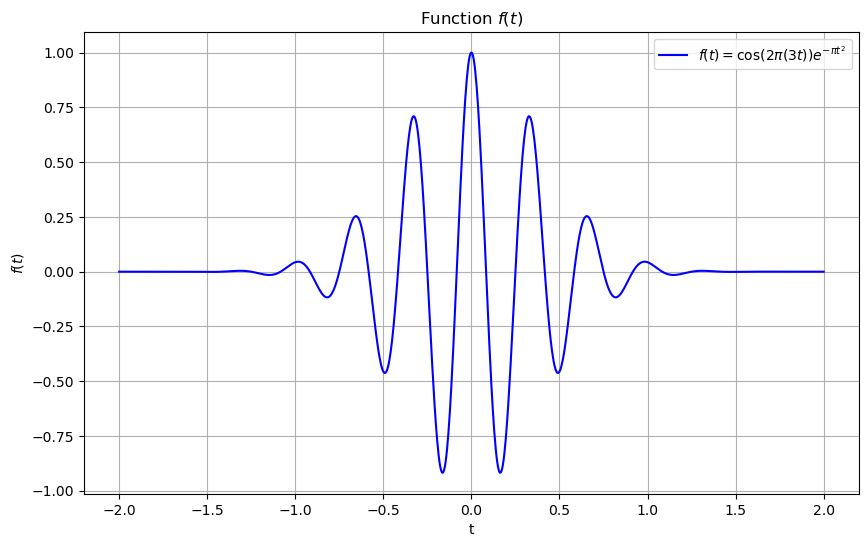

In [2]:
# put your code here

import numpy as np
import matplotlib.pyplot as plt

# defining the function f(t)
def f(t):
    return np.cos(2 * np.pi * 3 * t) * np.exp(-np.pi * t**2)

# generating values for t
t_values = np.linspace(-2, 2, 1000)

# calculating f(t) for the given values of t
f_values = f(t_values)

# plotting
plt.figure(figsize=(10, 6))
plt.plot(t_values, f_values, label='$f(t) = \cos(2\pi(3t))e^{-\pi t^2}$', color='b')
plt.title('Function $f(t)$')
plt.xlabel('t')
plt.ylabel('$f(t)$')
plt.grid(True)
plt.legend()
plt.show()

#### 1.3.2 Calculate Fourier components
Calculate $c_n$ with $n\in\{1, 2, 3\}$, then plot real and imaginary parts of those wave components on separate plots.

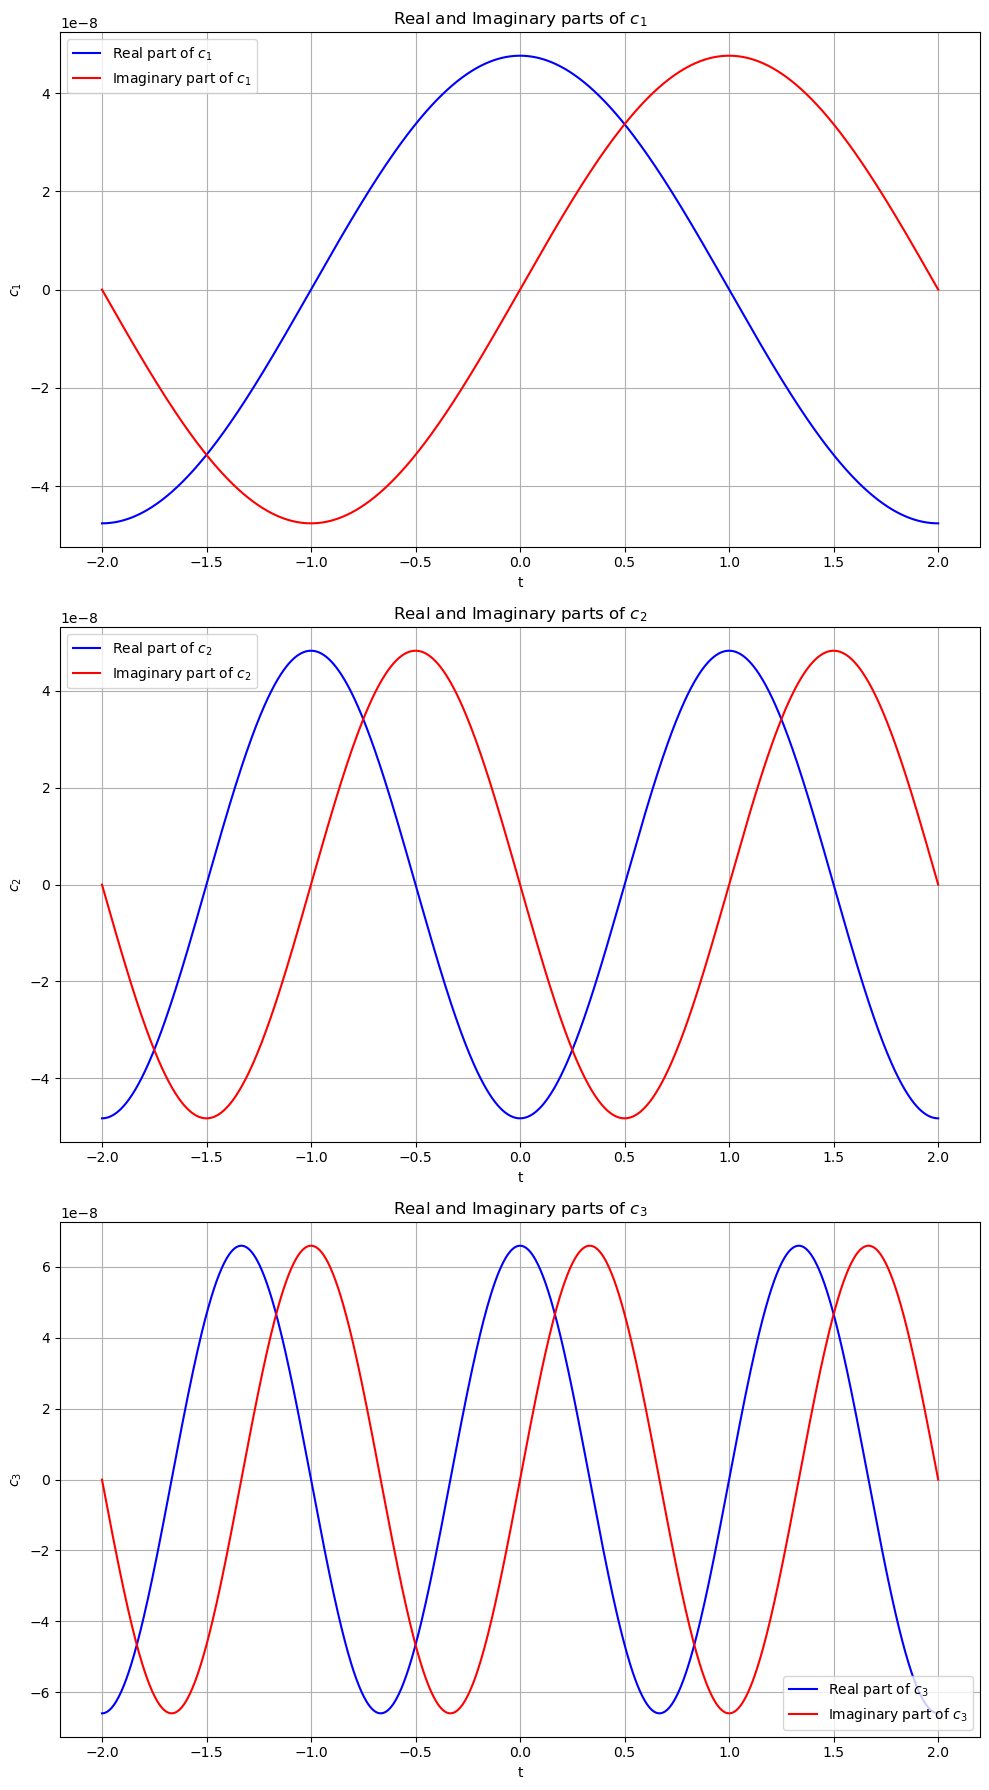

In [3]:
# put your code here

# Fourier coefficient calculation function
def fourier_coefficient(f, T, n):
    dt = T / 1000  # sampling interval for integration
    t_values = np.arange(-T / 2, T / 2, dt)  # values of t for integration
    integrand = f(t_values) * np.exp(-2j * np.pi * n / T * t_values)  
    return np.trapz(integrand, t_values) / T  # trapezoidal integration

# defining T and calculatign Fourier coefficients
T = 4
n_values = [1, 2, 3]
c_values = [fourier_coefficient(f, T, n) for n in n_values]

# plotting real and imaginary parts of the Fourier components
plt.figure(figsize=(10, 18))
for i, n in enumerate(n_values):
    plt.subplot(len(n_values), 1, i+1)
    plt.plot(t_values, c_values[i].real * np.cos(2 * np.pi * n / T * t_values) - c_values[i].imag * np.sin(2 * np.pi * n / T * t_values), label=f'Real part of $c_{n}$', color='b')
    plt.plot(t_values, c_values[i].real * np.sin(2 * np.pi * n / T * t_values) + c_values[i].imag * np.cos(2 * np.pi * n / T * t_values), label=f'Imaginary part of $c_{n}$', color='r')
    plt.title(f'Real and Imaginary parts of $c_{n}$')
    plt.xlabel('t')
    plt.ylabel(f'$c_{n}$')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

------
# Part 2: Discrete Fourier Transformation (DFT)
Commonly in physics (and in other applications) $f$ is not known as an analytic function, and often $f$ is not even known over a continuous range.
For example, $f$ may be the signal measured in a laboratory experiment or the output of a lengthy computer program.
In such cases, we must calculate the Fourier coefficients numerically.
We already studied a number of numerical-integration methods in this class, and they can be applied in calculating Fourier transforms.

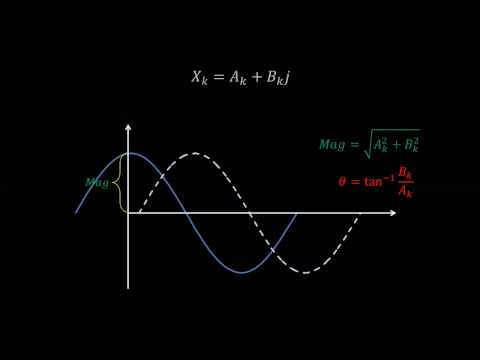

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("mkGsMWi_j4Q",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=mkGsMWi_j4Q

### 2.1 DFT code example

The discrete Fourier transform is straightforward to calculate in Python.
Below is a function that evaluates

$$ c_k = \sum_{n=0}^{N-1} e^{-i \frac{2 \pi k n}{N}}$$

for $N$ real samples $y_n$ for all $k$ in the range $0 \leq k \leq \frac{1}{2}N$.

Please add comment to the following code line by line.
Pay special attention to what `//` does in Python.

In [5]:
import numpy as np

def dft(y):  # defining a function named dft that takes an array y as input
    N = len(y)  # finding length of the input array y
    c = np.zeros(N//2 + 1, complex)  # creating an empty array to store the Fourier coefficients
    for k in range(N//2 + 1):  # looping over each frequency index k
        for n in range(N):  # looping over each sample index n
            # accumulating each sample to the Fourier coefficient c_k with formula for DFT
            c[k] += y[n] * np.exp(-2j * np.pi * k * n / N)
    return c  # returning the array of Fourier coefficients

### 2.2 Test the function
Use the code to calculate the FT example from the video.
Make sure the first 4 terms agree with the video results at timestamp 8:15.

In [6]:
# put your code here

# signal y(t)
def example_signal(t):
    return np.cos(2 * np.pi * 3 * t) * np.exp(-np.pi * t**2)

# Generate samples of the example signal
t_values = np.linspace(-2, 2, 1000)  # Time values from -2 to 2 seconds
y_values = example_signal(t_values)  # Signal values corresponding to time values

# Calculate the Discrete Fourier Transform (DFT) of the example signal
dft_coefficients = dft(y_values)

# Print the calculated Fourier coefficients
print("DFT Coefficients:")
print(dft_coefficients)

DFT Coefficients:
[-4.01223970e-05+0.00000000e+00j -4.04874364e-05-1.27195446e-07j
 -4.11910998e-05-2.58814728e-07j -5.86541604e-05-5.52818795e-07j
  3.84154690e-04+4.82768430e-06j -8.21574332e-03-1.29063209e-04j
  1.04758718e-01+1.97488921e-03j -9.09046856e-01-1.99942077e-02j
  5.32713897e+00+1.33913802e-01j -2.10974441e+01-5.96675190e-01j
  5.64608053e+01+1.77435229e+00j -1.02107248e+02-3.52997847e+00j
  1.24782674e+02+4.70642581e+00j -1.03048739e+02-4.21092457e+00j
  5.75068147e+01+2.53091399e+00j -2.16864327e+01-1.02270620e+00j
  5.52635545e+00+2.78019112e-01j -9.51730979e-01-5.08775500e-02j
  1.10696674e-01+6.26643035e-03j -8.75231046e-03-5.23049033e-04j
  4.23730884e-04+2.66588876e-05j -5.14820312e-05-3.40138328e-06j
 -3.07526563e-05-2.12886188e-06j -2.79028658e-05-2.01968325e-06j
 -2.50476483e-05-1.89213510e-06j -2.25647081e-05-1.77588104e-06j
 -2.04007759e-05-1.67007993e-06j -1.85123723e-05-1.57405189e-06j
 -1.68604736e-05-1.48696214e-06j -1.54110482e-05-1.40793948e-06j
 -1.413

### 2.3 Modify the function
Now update the `dft(y)` to `dft2(y,k)` so that it takes a new parameter $k$, returning just $c_k$.
Write the new definition below and print out $c_7$; make sure it agrees with the video result.

In [7]:
# put your code here

import numpy as np

def dft2(y, k):  # Updated function taking an additional parameter k
    N = len(y)
    c_k = 0j  # Initialize the Fourier coefficient c_k as a complex number
    for n in range(N):
        c_k += y[n] * np.exp(-2j * np.pi * k * n / N)  # Accumulate the contribution of each sample to c_k
    return c_k  # Return the Fourier coefficient c_k
# Define the example signal y(t)
def example_signal(t):
    return np.cos(2 * np.pi * 3 * t) * np.exp(-np.pi * t**2)

# Generate samples of the example signal
t_values = np.linspace(-2, 2, 1000)  # Time values from -2 to 2 seconds
y_values = example_signal(t_values)  # Signal values corresponding to time values

# Calculate the Fourier coefficient c_7 using the updated dft2 function
c_7 = dft2(y_values, 7)

# Print the calculated Fourier coefficient c_7
print("c_7:")
print(c_7)


c_7:
(-0.909046855674666-0.019994207705837822j)


---
## Part 3: Fast Fourier Transformation (FFT)

Fourier transforms are widely used in engineering, music, science, and mathematics, but while DFT is useful in many fields, computing it directly from the definition is often too slow to be practical.
Fast Fourier transformation (FFT) is an algorithm that computes the DFT of a sequence, but with a performance vastly exceeding that of standard DFT implementations.
An FFT rapidly computes such transformations by factorizing the DFT matrix into a product of sparse (mostly zero) factors.
As a result, it reduces the complexity of computing the DFT from $O\left(N^{2}\right)$, where $N$ is the data size, to $O(N\log N)$.
The difference in speed can be enormous, especially for large data sets, where $N$ may be in the thousands or millions.
In addition, many FFT algorithms are much more accurate in terms of round-off errors than evaluating the DFT definition directly or indirectly.
There are many different FFT algorithms based on a wide range of published theories, from simple complex-number arithmetic to group theory and number theory.

### 3.1 General ideas about how FFT algorithms work

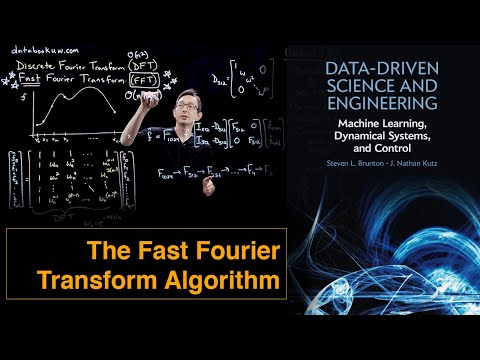

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("toj_IoCQE-4",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=toj_IoCQE-4
# Direct link on YourTube: https://www.youtube.com/watch?v=E8HeD-MUrjY

### 3.2 Use NumPy's `fft`  function
We are not going to write an FFT on our own but will use `numpy.fft` instead.
Check out the example of how to use `fft` [here](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html).
Copy-paste the example code and add line-by-line comments to the code to make sure you understand it.

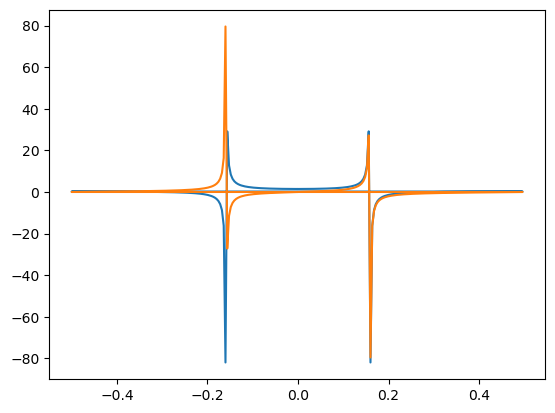

In [10]:
# creating a time array with 256 values
t = np.arange(256)

# np.sin(t) generates a sine wave signal with amplitudes varying with time t
# np.fft.fft computes the FFT of the input signal
sp = np.fft.fft(np.sin(t))

# computing the frequencies corresponding to the FFT result using np.fft.fftfreq
# t.shape[-1] gives the size of the last dimension of t, which is 256
freq = np.fft.fftfreq(t.shape[-1])

# plotting the real and imaginary parts of the FFT result
plt.plot(freq, sp.real, freq, sp.imag)

# displaying the plot
plt.show()

### 3.3 Example

Download this file [dow.txt](https://drive.google.com/file/d/1srLSfzkueDAEDF9fdhR0xdHAlq3Lv53y/view?usp=sharing):
It contains the daily closing values for each business day from late 2006 until the end of 2010 for the Dow Jones Industrial Average, which is an index tracking some of the largest companies trading in the US stock market.

#### 3.3.1
Read in the data from `dow.txt` and create a plot.


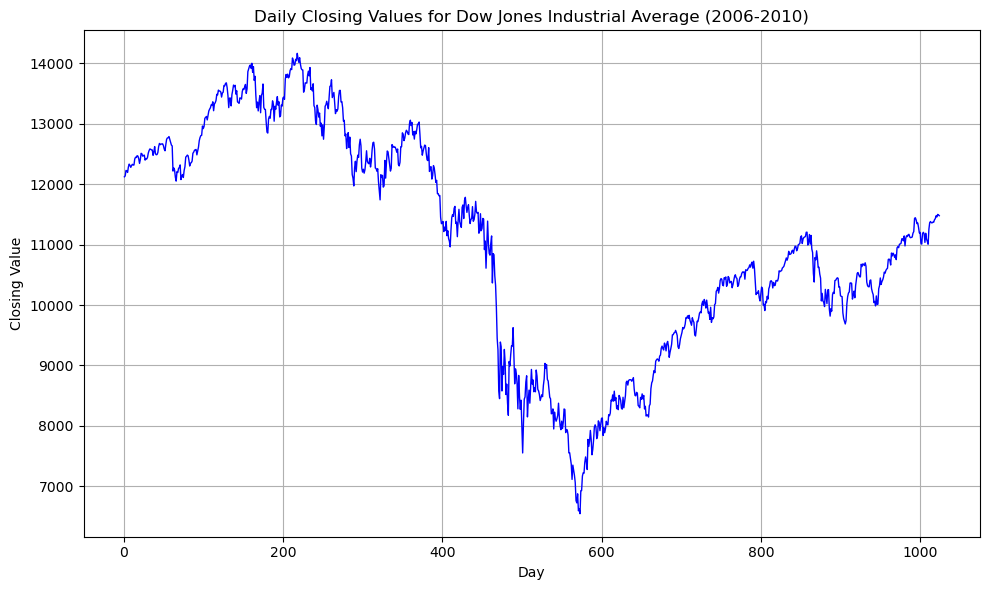

In [11]:
# reading data from dow.txt
file_path = 'dow.txt'  
closing_values = []

with open(file_path, 'r') as file:
    for line in file:
        # converting each line to float and append to the list of closing values
        closing_values.append(float(line.strip()))

# generating x-axis indices
dates = range(1, len(closing_values) + 1)

# plotting
plt.figure(figsize=(10, 6))  
plt.plot(dates, closing_values, color='blue', linewidth=1)  
plt.title('Daily Closing Values for Dow Jones Industrial Average (2006-2010)')
plt.xlabel('Day')
plt.ylabel('Closing Value')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3.3.2
Calculate the coefficients of the DFT of the data using the function `rfft` from `numpy.fft`, which produces an array of $\frac{1}{2} N+1$ complex numbers.

In [12]:
# reading data from dow.txt
file_path = 'dow.txt'
closing_values = []

with open(file_path, 'r') as file:
    for line in file:
        # converting each line to float and append to the list of closing values
        closing_values.append(float(line.strip()))

# computing DFT coefficients using numpy.fft.rfft
dft_coefficients = np.fft.rfft(closing_values)
print("DFT Coefficients:", dft_coefficients)

DFT Coefficients: [ 1.12839039e+07+0.00000000e+00j  6.84127740e+05-9.55087519e+05j
 -4.19226205e+05+9.29089562e+04j  7.41901498e+04-2.73812250e+05j
 -3.51856811e+04+7.23658613e+04j  1.11482643e+05-3.14779807e+04j
  2.16752824e+04-2.45751549e+04j  1.11224416e+04+2.47975704e+04j
  3.11884665e+04+2.27868210e+04j  7.38523102e+03-3.21233427e+04j
 -3.39615972e+04-1.07833052e+05j -1.23569569e+04+2.73171276e+04j
  2.13837315e+04-9.16684147e+04j -4.32441725e+04+9.92294540e+04j
 -3.55753518e+03-2.54972743e+04j -3.04367677e+04-1.72551151e+04j
 -9.31799610e+03-2.49297658e+04j -9.35033325e+03-1.75612302e+04j
  1.17418062e+04+2.09235370e+04j  4.22549031e+04-2.38143067e+03j
  1.35294835e+04-3.06720066e+04j  4.06499470e+03-2.87140744e+04j
 -1.56146318e+04+2.24811825e+04j  1.35756353e+04-1.28123867e+04j
  1.20484888e+04+3.50866363e+03j -1.55111478e+04-1.70617041e+04j
  8.98307189e+03+4.49546331e+03j  4.42970647e+03+1.59761534e+03j
 -3.00967682e+04-3.74705070e+04j -1.96285643e+03-4.83894355e+03j
  2.979


#### 3.3.3 (optional) Submit your notebook before you try this
Try to see what happens if you use the `dft` function to compute the FT.

In [13]:
# put your code here

---
## Assignment Wrap-up


Please submit your notebook **in ipynb format** to Gradescope.

**You must complete the pre-class survey in order to receive credit for the assignment!**